
# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [51]:
# import all necessary librabries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# load in the first dataset (twitter archive enhanced) and print out the first five rows
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [53]:
# save the url of the file in a variable and request the file from the server
url_file = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url_file)

In [54]:
# now, we open and write it out to a local file
file = open("image_predictions.tsv", "wb")
file.write(response.content)
file.close()

In [55]:
# the 'with' statement below automatically calls the close method at the end
with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

In [56]:
# read the data into pandas dataframe and check for first twenty rows
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')
df_2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# this code is gotten from the classroom
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [57]:
# gathering using Json file
df_3_list = []
count = 0
my_file = 'tweet-json.txt'
with open(my_file, encoding='utf-8') as file:
    for file_line in file:
        count +=1
        json_file = file.readline()
        my_data = (json.loads(file_line))
        tweet_id = my_data['id']
        retweet_count = my_data['retweet_count']
        favorite_count = my_data['favorite_count']
        df_3_list.append({'tweet_id': tweet_id,
                                 'retweet_count':retweet_count,
                                 'favorite_count':favorite_count})
        df_3 = pd.DataFrame(df_3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
    

In [58]:
# check the data in the third dataset
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226
...,...,...,...
1172,666058600524156928,61,115
1173,666055525042405380,261,448
1174,666050758794694657,60,136
1175,666044226329800704,147,311


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter Archive Enhanced Data

**Visual Assessment**

In [59]:
# check the last thirty rows for visual assessment
df_1.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None


#### Programmatic Assessment for quality and tidiness issues

**Quality related issues are missing values, incorrect datatypes, duplicates and inconsistent data.**

**Tidiness/Messy issues can be found in dataset that has issue with its structure.**

In [60]:
# check for general information of the dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [61]:
# check for missing values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

The code above shows that there are some missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

In [62]:
# check for the dimension of the dataset
df_1.shape

(2356, 17)

The code above shows that there are 2356 rows and 17 columns in the dataset.

In [63]:
# check for duplicates in the 'tweet_id'
df_1['tweet_id'].duplicated().sum()

0

In [64]:
# check for the datatypes of the variables
df_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [65]:
# check for the satistical values of the dataset
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
# check if denominator is greater than 10
check_denominator = df_1.query('rating_denominator != 10')
check_denominator = check_denominator['rating_denominator']
check_denominator.shape;

### Tweet Image Predictions Data

**Visual Assessment**

In [67]:
# check the first thirty rows for visual assessment
df_2.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic Assessment for quality and tidiness issues

In [68]:
# check for general information of the dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
# check for the dimension of the dataset
df_2.shape

(2075, 12)

The code above shows that there are 2075 rows and 12 columns in the dataset

In [70]:
# check for missing values
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [71]:
# check for duplicates
df_2['tweet_id'].duplicated().any()

False

In [72]:
# check for the datatypes of the variables
df_2.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [73]:
# check for the satistical values of the dataset
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [74]:
# check for all the columns names in the dataset
print(df_2.columns.tolist())

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [75]:
df_2['jpg_url'].duplicated().sum()

66

There are 66 duplicated rows in 'jpg_url' column of df_2

### Tweet_Json Data

**Visual Assessment**

In [76]:
# check the first thirty rows for visual assessment
df_3.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226
5,890006608113172480,7624,31166
6,889665388333682689,8538,38818
7,889531135344209921,2321,15359
8,888917238123831296,4709,29611
9,888554962724278272,3732,20290


#### Programmatic Assessment for quality and tidiness issues

In [77]:
# check for general information of the dataset
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [78]:
# check for the dimension of the dataset
df_3.shape

(1177, 3)

The code above shows that there are 1177 rows and 3 columns in the dataset

In [79]:
# check for missing values
df_3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [80]:
# check for duplicates
df_3['tweet_id'].duplicated().any()

False

In [81]:
# check for the datatypes of the variables
df_3.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [82]:
# check for the satistical values of the dataset
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.427463e+17,3222.255735,8260.755310
std,6.856773e+16,5106.835873,12088.982006
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,634.000000,1499.000000
50%,7.195514e+17,1483.000000,3705.000000
75%,7.993088e+17,3737.000000,10202.000000
max,8.924206e+17,52360.000000,132810.000000


### Quality issues
1. 'rating_denominator' variable in df_1 should be 10, not more not less. 

2. Missing values in 'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp' of df_1.

3. The data in 'source' is not well formatted.

4. Ratings with decimal values incorrectly extracted.

5. Timestamp in df1 has a wrong datatype. Its seen to be object instead of date time.

6. Columns p1, p2, and p3 values not in standard format in df_2.

7. TimeStamp variable contains multiple values (time and date) 

8. Duplicates in jpj_url of df_2

### Tidiness issues
1. Variables (doggo, pupper, puppo, floofer) names passed as their values.

2. All the three datasets should be merged as one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [93]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Issue #1:  rating_denominator variable in df_1 should be 10, not more not less. 

#### Define: Assign 10 (fixed integer) as the values of rating_denominator variable

#### Code

In [84]:
df_1_clean['rating_denominator'] = 10

#### Test

In [85]:
#check if there is any denominator not equalls to 10
df_1_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [86]:
# check the last thirty rows
df_1_clean.tail(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,10,an,None,None,None,None


### Issue #2:  Missing values in 'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp' columns of df_1.

#### Define: Drop the columns since they are not needed for the analysis

#### Code

In [94]:
# remove all non null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp' columns
df_1_clean = df_1_clean[df_1_clean['retweeted_status_id'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_user_id'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_timestamp'].isnull()]

#### Test

In [95]:
# test if there are still nonnull values in the columns
print(df_1_clean['retweeted_status_id'].notnull().sum())
print(df_1_clean['retweeted_status_user_id'].notnull().sum())
print(df_1_clean['retweeted_status_timestamp'].notnull().sum())

0
0
0


#### Code

In [96]:
# drop all columns with missing values
df_1_clean = df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [97]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3:  Data in 'source' variable  of df_1 not well formatted.

#### Define: Extract the link from the data

#### Code

In [98]:
expression = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
df_1_clean['source']= df_1_clean["source"].str.extract(expression, expand=True)

#### Test

In [99]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #4: Find and update incorrect ratings in df_1.

#### Define: Capture the rating values from the text column

#### Code

In [100]:
df_1_clean.drop('rating_numerator', axis=1, inplace=True)

In [101]:
ratings = df_1_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
print(ratings)

       0   1
0     13  10
1     13  10
2     12  10
3     13  10
4     12  10
...   ..  ..
2351   5  10
2352   6  10
2353   9  10
2354   7  10
2355   8  10

[2175 rows x 2 columns]


In [102]:
ratings.columns = ['rating_numerator', 'rating_denomenator']
df_1_clean['rating_numerator'] = ratings['rating_numerator']

#### Test

In [103]:
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,None,None,None,None,13
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,None,None,None,None,13
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,None,None,None,None,12
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,None,None,None,None,13
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,None,None,None,None,12


### Issue #5: Timestamp in df1 has a wrong datatype. Its seen to be object instead of date time.

#### Define: Convert datatype object to datetime datatype

#### Code

In [104]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'], infer_datetime_format=True)

#### Test

In [105]:
df_1_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #6: timeStamp variable contains multiple values (time and date)

#### Define: Separate the values into two different values 

#### Code

In [106]:
df_1_clean['tweet_time'] = df_1_clean['timestamp'].dt.time
df_1_clean['tweet_day'] = df_1_clean['timestamp'].dt.date
df_1_clean = df_1_clean.drop('timestamp', axis = 1)
df_1_clean.head()

,tweet_id,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator,tweet_time,tweet_day
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,None,None,None,None,13,16:23:56,2017-08-01
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,None,None,None,None,13,00:17:27,2017-08-01
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,None,None,None,None,12,00:18:03,2017-07-31
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,None,None,None,None,13,15:58:51,2017-07-30
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,None,None,None,None,12,16:00:24,2017-07-29


### Issue #7: Columns p1, p2, and p3 values not in standard format in df_2.

#### Define: Ensure the values in colums p1, p2 and p3 are of standard format.

#### Code

In [107]:
# convert strings to lower case
df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

#### Test

In [110]:
# check for the first few rows to see if the change has been made
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8:  Duplicates in 'jpj_url' of df_2

#### Define: Leave the first row of the duplicated rows and drop all others.

#### Code

In [111]:
df_2_clean.drop_duplicates(subset="jpg_url",
                     keep='first', inplace=True)

#### Test

In [112]:
df_2_clean.duplicated().sum()

0

### Issue #9: Variables (doggo, pupper, puppo, floofer) names passed as their values.

#### Define: doggo, pupper, puppo and floofer variable names would be converted to single variable name 'dogs_stage'.

#### Code

In [113]:
df_1_clean.replace(to_replace={
             'doggo':{"None":''}, 
             'floofer':{"None":''},
             'puppo':{"None":''},
             'pupper':{"None":''},
                 },inplace = True)

In [114]:
df_1_clean.head(5)

,tweet_id,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator,tweet_time,tweet_day
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,,,,,13,16:23:56,2017-08-01
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,,,,,13,00:17:27,2017-08-01
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,,,,,12,00:18:03,2017-07-31
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,,,,,13,15:58:51,2017-07-30
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,,,,,12,16:00:24,2017-07-29


In [115]:
df_1_clean['dog_stage'] = df_1_clean.doggo + df_1_clean.pupper + df_1_clean.puppo + df_1_clean.floofer

In [116]:
df_1_clean = df_1_clean.drop(['doggo', 'pupper', 'puppo','floofer'], axis=1)

In [117]:
# Based on the information provided in the classroom, dog without stage is floof
df_1_clean.dog_stage.replace('', 'floof', inplace = True)

#### Test

In [118]:
df_1_clean.tail(30)

,tweet_id,source,text,expanded_urls,rating_denominator,name,rating_numerator,tweet_time,tweet_day,dog_stage
2326,666411507551481857,http://twitter.com/download/iphone,This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,10,quite,2,00:24:19,2015-11-17,floof
2327,666407126856765440,http://twitter.com/download/iphone,This is a southern Vesuvius bumblegruff. Can d...,https://twitter.com/dog_rates/status/666407126...,10,a,7,00:06:54,2015-11-17,floof
2328,666396247373291520,http://twitter.com/download/iphone,Oh goodness. A super rare northeast Qdoba kang...,https://twitter.com/dog_rates/status/666396247...,10,None,9,23:23:41,2015-11-16,floof
2329,666373753744588802,http://twitter.com/download/iphone,Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,10,None,11,21:54:18,2015-11-16,floof
2330,666362758909284353,http://twitter.com/download/iphone,Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,10,None,6,21:10:36,2015-11-16,floof
2331,666353288456101888,http://twitter.com/download/iphone,Here we have a mixed Asiago from the Galápagos...,https://twitter.com/dog_rates/status/666353288...,10,None,8,20:32:58,2015-11-16,floof
2332,666345417576210432,http://twitter.com/download/iphone,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10,None,10,20:01:42,2015-11-16,floof
2333,666337882303524864,http://twitter.com/download/iphone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,10,an,9,19:31:45,2015-11-16,floof
2334,666293911632134144,http://twitter.com/download/iphone,This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,10,a,3,16:37:02,2015-11-16,floof
2335,666287406224695296,http://twitter.com/download/iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,2,an,1,16:11:11,2015-11-16,floof


 #### From the dogtionary provided in the classroom, dog with stage of both doggo and pupper is a puppo

In [119]:
# Replace doggopuppo with doggopupper

df_1_clean.dog_stage.replace('doggopupper', 'puppo', inplace = True)

In [120]:
# confirm if the code above is correct
df_1_clean.query('dog_stage == "doggopupper"')

,tweet_id,source,text,expanded_urls,rating_denominator,name,rating_numerator,tweet_time,tweet_day,dog_stage


### Issue #10: Merge all the three datasets (twitter archive enhanced, image predictions and tweet json) as one dataframe.

#### Define: Merge the 3 dataframes together into a single dataframe

#### Code

In [121]:
# first, merge df_1_clean and df_2_clean 
df_2_clean = pd.merge(df_1_clean, df_2_clean, how="inner",
                             on= 'tweet_id')

In [122]:
df_2_clean.head()

,tweet_id,source,text,expanded_urls,rating_denominator,name,rating_numerator,tweet_time,tweet_day,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,13,16:23:56,2017-08-01,floof,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,13,00:17:27,2017-08-01,floof,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,12,00:18:03,2017-07-31,floof,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,13,15:58:51,2017-07-30,floof,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,12,16:00:24,2017-07-29,floof,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [123]:
# then merge the new df_2_clean with df_3_clean
df_2_clean = pd.merge(df_2_clean, df_3_clean, how="inner",
                             on= 'tweet_id')

#### Test

In [124]:
df_2_clean.head()

,tweet_id,source,text,expanded_urls,rating_denominator,name,rating_numerator,tweet_time,tweet_day,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,13,16:23:56,2017-08-01,floof,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,12,00:18:03,2017-07-31,floof,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,12,16:00:24,2017-07-29,floof,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048
3,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,Jax,13,16:27:12,2017-07-28,floof,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
4,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,Zoey,13,16:25:51,2017-07-27,floof,...,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4429,28226


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [125]:
# store the cleaned master dataset
df_2_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [126]:
# load the cleaned master dataset into a new dataframe
df_merged = pd.read_csv('twitter_archive_master.csv')

In [127]:
df_merged.drop('retweet_count', axis=1)

,tweet_id,source,text,expanded_urls,rating_denominator,name,rating_numerator,tweet_time,tweet_day,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,13.0,16:23:56,2017-08-01,floof,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467
1,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,12.0,00:18:03,2017-07-31,floof,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461
2,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,12.0,16:00:24,2017-07-29,floof,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048
3,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,Jax,13.0,16:27:12,2017-07-28,floof,...,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,12041
4,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,Zoey,13.0,16:25:51,2017-07-27,floof,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,28226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,666058600524156928,http://twitter.com/download/iphone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,10,the,8.0,01:01:59,2015-11-16,floof,...,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,115
997,666055525042405380,http://twitter.com/download/iphone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,a,10.0,00:49:46,2015-11-16,floof,...,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,448
998,666050758794694657,http://twitter.com/download/iphone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,a,10.0,00:30:50,2015-11-16,floof,...,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,136
999,666044226329800704,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,10,a,6.0,00:04:52,2015-11-16,floof,...,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311


In [128]:
Dog_Stage = df_merged.groupby('dog_stage')['rating_numerator'].mean() 
Dog_Stage

dog_stage
doggo         11.666667
doggopuppo    13.000000
floof         11.849367
floofer       11.000000
pupper        10.429896
puppo         11.666667
Name: rating_numerator, dtype: float64

In [129]:
Number_of_Image = df_merged.groupby('img_num')['rating_numerator'].mean()
Number_of_Image

img_num
1    11.503248
2    13.451613
3    11.500000
4    12.450000
Name: rating_numerator, dtype: float64

In [130]:
Favorite_count = df_merged.groupby('favorite_count')['rating_numerator'].mean()
Favorite_count

favorite_count
115        8.0
121        6.0
131        7.0
132        7.0
136       10.0
          ... 
75639     13.0
85011     13.0
95450     14.0
106827    13.0
132810    13.0
Name: rating_numerator, Length: 961, dtype: float64

### Insights:
1. Dog between the stages of doggo and puppo receive the highest rating.

2. The number of dog images in a tweet influence the ratings.

3. Favorite/likes count plays a big role in the ratings of the dog stages.

### Visualization

In [131]:
# Define a function to plot barchart
def barChart(Dataframe, x_label, y_label, title, size):
    Dataframe.plot.bar(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

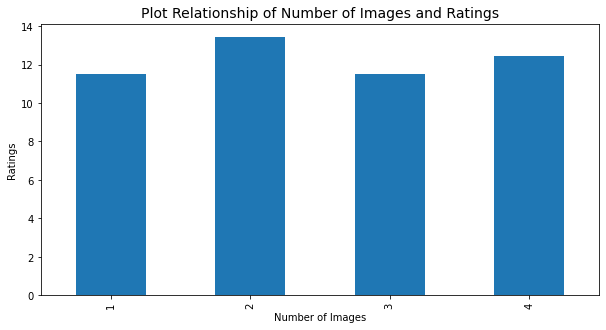

In [135]:
barChart(Number_of_Image,'Number of Images','Ratings','Plot Relationship of Number of Images and Ratings', (10,5))

**The above graph shows that dogs with more than an image have high tweet ratings**